## 01. Import Libraries and Data

In [1]:
#import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#import data

path = r'/Users/juliewhitton/Desktop/Personal Project/'
df_inc = pd.read_csv(os.path.join(path, 'Data', 'Final Data', 'inc_ordered.csv'))
df_pop = pd.read_csv(os.path.join(path, 'Data', 'Intermediary Data', 'pop_ordered.csv'))
df_v = pd.read_csv(os.path.join(path, 'Data', 'Final Data', 'v_incs.csv'), low_memory = False)

df_v.head()

,incident_id,0,1,2,3,4,5,6,7,8,...,27,28,29,30,31,32,33,34,35,36
0,95289,Shots Fired - No Injuries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,92401,Officer Involved Incident,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,92383,"Shot - Dead (murder, accidental, suicide)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,92142,Shot - Wounded/Injured,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,95261,Shot - Wounded/Injured,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_inc.head()

,incident_id,state,year,n_killed,n_injured,n_guns_involved,latitude,longitude
0,95289,MI,2014,0,0,NaN,43.2301,-86.2514
1,92401,NJ,2014,0,0,NaN,40.7417,-74.1695
2,92383,NY,2014,1,0,NaN,40.7034,-73.7474
3,92142,NY,2014,0,1,NaN,40.6715,-73.9476
4,95261,MO,2014,0,1,NaN,37.2646,-93.3007


In [4]:
#remove unnecessary cols

df_inc = df_inc[['incident_id', 'state', 'year']]
df_inc.head()

,incident_id,state,year
0,95289,MI,2014
1,92401,NJ,2014
2,92383,NY,2014
3,92142,NY,2014
4,95261,MO,2014


In [5]:
df_pop.head()

,state,year,population
0,AL,2014,4841799
1,AK,2014,736283
2,AZ,2014,6730413
3,AR,2014,2967392
4,CA,2014,38596972


## 02. Create Incident Rate and Incident Rate Flag Columns

In [6]:
#merge df_pop to df_inc_rate

df_inc_rate = df_inc.merge(df_pop, on=['state', 'year'], how='left')
df_inc_rate.head()

,incident_id,state,year,population
0,95289,MI,2014,9929848
1,92401,NJ,2014,8864525
2,92383,NY,2014,19651049
3,92142,NY,2014,19651049
4,95261,MO,2014,6056202


In [7]:
#create new col 'inc_type'

df_inc_rate['inc_type'] = np.where(df_inc_rate['incident_id'].isin(df_v['incident_id']), 'V', 'NV')
df_inc_rate['inc_type'].value_counts(dropna = False)

V     209035
NV     16562
Name: inc_type, dtype: int64

In [8]:
df_inc_rate.head()

,incident_id,state,year,population,inc_type
0,95289,MI,2014,9929848,V
1,92401,NJ,2014,8864525,V
2,92383,NY,2014,19651049,V
3,92142,NY,2014,19651049,V
4,95261,MO,2014,6056202,V


In [9]:
df_inc_rate.shape

(225597, 5)

In [10]:
df_inc_rate['total_incs'] = df_inc_rate.groupby(['state', 'year'])['incident_id'].transform('count')

In [11]:
df_inc_rate['total_incs'].value_counts(dropna = False)

5089    5089
5055    5055
4588    4588
4201    4201
4156    4156
        ... 
72        72
71        71
68        68
64        64
48        48
Name: total_incs, Length: 198, dtype: int64

In [12]:
df_inc_rate.head()

,incident_id,state,year,population,inc_type,total_incs
0,95289,MI,2014,9929848,V,1447
1,92401,NJ,2014,8864525,V,1521
2,92383,NY,2014,19651049,V,1903
3,92142,NY,2014,19651049,V,1903
4,95261,MO,2014,6056202,V,1272


In [13]:
df_inc_rate['total_v_incs'] = df_inc_rate.groupby(['state', 'year'])['inc_type'].transform(lambda x: 
                                                                                           (x == 'V').sum())
df_inc_rate['total_nv_incs'] = df_inc_rate.groupby(['state', 'year'])['inc_type'].transform(lambda x: 
                                                                                            (x == 'NV').sum())
df_inc_rate.head()

,incident_id,state,year,population,inc_type,total_incs,total_v_incs,total_nv_incs
0,95289,MI,2014,9929848,V,1447,1393,54
1,92401,NJ,2014,8864525,V,1521,1480,41
2,92383,NY,2014,19651049,V,1903,1784,119
3,92142,NY,2014,19651049,V,1903,1784,119
4,95261,MO,2014,6056202,V,1272,1195,77


In [14]:
#remove 'incident_id' col

df_inc_rate.drop(columns = 'incident_id', inplace = True)
df_inc_rate.head()

,state,year,population,inc_type,total_incs,total_v_incs,total_nv_incs
0,MI,2014,9929848,V,1447,1393,54
1,NJ,2014,8864525,V,1521,1480,41
2,NY,2014,19651049,V,1903,1784,119
3,NY,2014,19651049,V,1903,1784,119
4,MO,2014,6056202,V,1272,1195,77


In [15]:
df_inc_rate.shape

(225597, 7)

In [16]:
#remove dupes

df_rate_final = df_inc_rate.drop_duplicates(subset=['state', 'year'], keep='first')
df_rate_final.shape

(204, 7)

In [17]:
df_rate_final.head()

,state,year,population,inc_type,total_incs,total_v_incs,total_nv_incs
0,MI,2014,9929848,V,1447,1393,54
1,NJ,2014,8864525,V,1521,1480,41
2,NY,2014,19651049,V,1903,1784,119
4,MO,2014,6056202,V,1272,1195,77
5,GA,2014,10067278,V,2032,1859,173


In [18]:
#check results

nv_sum = df_rate_final['total_nv_incs'].sum()
nv_sum

16562

In [19]:
v_sum = df_rate_final['total_v_incs'].sum()
v_sum

209035

In [20]:
#export and import df_rate_final to avoid warnings

df_rate_final.to_csv(os.path.join(path, 'Data', 'Final Data', 'df_rate_final.csv'), index = False)

In [21]:
df_rate_final = pd.read_csv(os.path.join(path, 'Data', 'Final Data', 'df_rate_final.csv'))
df_rate_final.head()

,state,year,population,inc_type,total_incs,total_v_incs,total_nv_incs
0,MI,2014,9929848,V,1447,1393,54
1,NJ,2014,8864525,V,1521,1480,41
2,NY,2014,19651049,V,1903,1784,119
3,MO,2014,6056202,V,1272,1195,77
4,GA,2014,10067278,V,2032,1859,173


In [22]:
#create v_inc_rate col and calculate values

df_rate_final['v_inc_rate'] = (df_rate_final['total_v_incs'].div(df_rate_final
                                                                 ['population'].values)*100000).round(2)
df_rate_final.head()

,state,year,population,inc_type,total_incs,total_v_incs,total_nv_incs,v_inc_rate
0,MI,2014,9929848,V,1447,1393,54,14.03
1,NJ,2014,8864525,V,1521,1480,41,16.70
2,NY,2014,19651049,V,1903,1784,119,9.08
3,MO,2014,6056202,V,1272,1195,77,19.73
4,GA,2014,10067278,V,2032,1859,173,18.47


In [23]:
#create nv_inc_rate col and calculate values

df_rate_final['nv_inc_rate'] = (df_rate_final['total_nv_incs'].div(df_rate_final['population'].values)*100000).round(2)
df_rate_final.head()

,state,year,population,inc_type,total_incs,total_v_incs,total_nv_incs,v_inc_rate,nv_inc_rate
0,MI,2014,9929848,V,1447,1393,54,14.03,0.54
1,NJ,2014,8864525,V,1521,1480,41,16.70,0.46
2,NY,2014,19651049,V,1903,1784,119,9.08,0.61
3,MO,2014,6056202,V,1272,1195,77,19.73,1.27
4,GA,2014,10067278,V,2032,1859,173,18.47,1.72


In [24]:
df_rate_final['v_inc_rate'].describe()

count    204.000000
mean      19.142255
std       13.163536
min        3.250000
25%       12.455000
50%       17.340000
75%       20.850000
max      125.920000
Name: v_inc_rate, dtype: float64

<AxesSubplot:xlabel='v_inc_rate', ylabel='Count'>

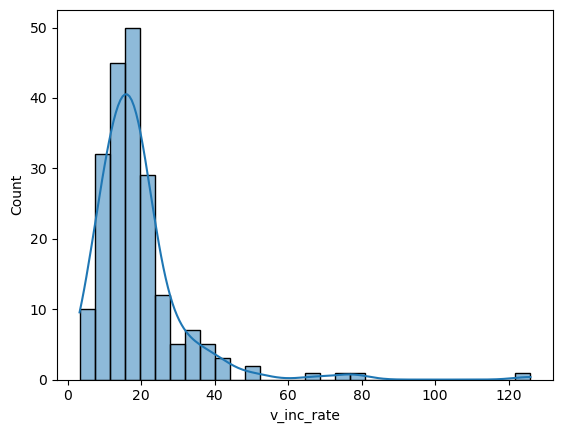

In [25]:
#create histogram for v_inc_rate

data = df_rate_final['v_inc_rate']

sns.histplot(data, bins = 30, kde = True)

In [26]:
#view quantiles for determining flags

df_quantile = df_rate_final[['year', 'v_inc_rate']]
df_quantile.groupby('year').quantile(q = 0.2, interpolation = 'linear')

,v_inc_rate
year,
2014,9.35
2015,11.34
2016,12.47
2017,12.27


In [27]:
#determine 40% quantile

df_quantile.groupby('year').quantile(q = 0.4, interpolation = 'linear')

,v_inc_rate
year,
2014,14.07
2015,15.33
2016,16.40
2017,14.97


In [28]:
#determine 60% quantile

df_quantile.groupby('year').quantile(q = 0.6, interpolation = 'linear')

,v_inc_rate
year,
2014,17.61
2015,17.94
2016,18.79
2017,19.72


In [29]:
#determine 80% quantile

df_quantile.groupby('year').quantile(q = 0.8, interpolation = 'linear')

,v_inc_rate
year,
2014,20.84
2015,21.25
2016,22.81
2017,25.69


In [30]:
#create flag column for 2014 rates

df_rate_final.loc[(df_rate_final['year'] == 2014) & (df_rate_final['v_inc_rate'] <= 9.35), 'v_inc_rate_flag'] = 'Very Low'
df_rate_final.loc[(df_rate_final['year'] == 2014) & (df_rate_final['v_inc_rate'] > 9.35) & 
                (df_rate_final['v_inc_rate'] <= 14.07), 'v_inc_rate_flag'] = 'Low'
df_rate_final.loc[(df_rate_final['year'] == 2014) & (df_rate_final['v_inc_rate'] > 14.07 ) & 
                (df_rate_final['v_inc_rate'] < 17.61), 'v_inc_rate_flag'] = 'Average'
df_rate_final.loc[(df_rate_final['year'] == 2014) & (df_rate_final['v_inc_rate'] >= 17.61) & 
                (df_rate_final['v_inc_rate'] <= 20.84), 'v_inc_rate_flag'] = 'High'
df_rate_final.loc[(df_rate_final['year'] == 2014) & (df_rate_final['v_inc_rate'] > 20.84), 
                  'v_inc_rate_flag'] = 'Very High'

df_rate_final['v_inc_rate_flag'].value_counts(dropna = False)

NaN          153
Very Low      11
High          11
Low           10
Very High     10
Average        9
Name: v_inc_rate_flag, dtype: int64

In [31]:
#create flag column for 2015 rates

df_rate_final.loc[(df_rate_final['year'] == 2015) & (df_rate_final['v_inc_rate'] <= 11.34), 
                  'v_inc_rate_flag'] = 'Very Low'
df_rate_final.loc[(df_rate_final['year'] == 2015) & (df_rate_final['v_inc_rate'] > 11.34) & 
                (df_rate_final['v_inc_rate'] <= 15.33), 'v_inc_rate_flag'] = 'Low'
df_rate_final.loc[(df_rate_final['year'] == 2015) & (df_rate_final['v_inc_rate'] > 15.33) & 
                (df_rate_final['v_inc_rate'] <= 17.94), 'v_inc_rate_flag'] = 'Average'
df_rate_final.loc[(df_rate_final['year'] == 2015) & (df_rate_final['v_inc_rate'] >= 17.94) & 
                (df_rate_final['v_inc_rate'] < 21.25), 'v_inc_rate_flag'] = 'High'
df_rate_final.loc[(df_rate_final['year'] == 2015) & (df_rate_final['v_inc_rate'] >= 21.25), 
                  'v_inc_rate_flag'] = 'Very High'

df_rate_final['v_inc_rate_flag'].value_counts(dropna = False)

NaN          102
Very Low      22
High          21
Very High     21
Low           20
Average       18
Name: v_inc_rate_flag, dtype: int64

In [32]:
#create flag column for 2016 rates

df_rate_final.loc[(df_rate_final['year'] == 2016) & (df_rate_final['v_inc_rate'] <= 12.47), 
                  'v_inc_rate_flag'] = 'Very Low'
df_rate_final.loc[(df_rate_final['year'] == 2016) & (df_rate_final['v_inc_rate'] > 12.47) & 
                (df_rate_final['v_inc_rate'] <= 16.4), 'v_inc_rate_flag'] = 'Low'
df_rate_final.loc[(df_rate_final['year'] == 2016) & (df_rate_final['v_inc_rate'] > 16.4) & 
                (df_rate_final['v_inc_rate'] <= 18.79), 'v_inc_rate_flag'] = 'Average'
df_rate_final.loc[(df_rate_final['year'] == 2016) & (df_rate_final['v_inc_rate'] >= 18.79) & 
                (df_rate_final['v_inc_rate'] < 22.81), 'v_inc_rate_flag'] = 'High'
df_rate_final.loc[(df_rate_final['year'] == 2016) & (df_rate_final['v_inc_rate'] >= 22.81), 
                  'v_inc_rate_flag'] = 'Very High'

df_rate_final['v_inc_rate_flag'].value_counts(dropna = False)

NaN          51
Very Low     33
Very High    32
High         31
Low          30
Average      27
Name: v_inc_rate_flag, dtype: int64

In [33]:
#create flag column for 2017 rates

df_rate_final.loc[(df_rate_final['year'] == 2017) & (df_rate_final['v_inc_rate'] <= 12.27), 
                  'v_inc_rate_flag'] = 'Very Low'
df_rate_final.loc[(df_rate_final['year'] == 2017) & (df_rate_final['v_inc_rate'] > 12.27) & 
                (df_rate_final['v_inc_rate'] <= 14.97), 'v_inc_rate_flag'] = 'Low'
df_rate_final.loc[(df_rate_final['year'] == 2017) & (df_rate_final['v_inc_rate'] > 14.97) & 
                (df_rate_final['v_inc_rate'] <= 19.72), 'v_inc_rate_flag'] = 'Average'
df_rate_final.loc[(df_rate_final['year'] == 2017) & (df_rate_final['v_inc_rate'] >= 19.72) & 
                (df_rate_final['v_inc_rate'] < 25.69), 'v_inc_rate_flag'] = 'High'
df_rate_final.loc[(df_rate_final['year'] == 2017) & (df_rate_final['v_inc_rate'] >= 25.69), 
                  'v_inc_rate_flag'] = 'Very High'

df_rate_final['v_inc_rate_flag'].value_counts(dropna = False)

Very Low     44
Very High    43
High         41
Low          40
Average      36
Name: v_inc_rate_flag, dtype: int64

In [34]:
df_rate_final.groupby(['year', 'v_inc_rate_flag']).size()

year  v_inc_rate_flag
2014  Average             9
      High               11
      Low                10
      Very High          10
      Very Low           11
2015  Average             9
      High               10
      Low                10
      Very High          11
      Very Low           11
2016  Average             9
      High               10
      Low                10
      Very High          11
      Very Low           11
2017  Average             9
      High               10
      Low                10
      Very High          11
      Very Low           11
dtype: int64

In [35]:
df_rate_final.groupby(['state', 'v_inc_rate_flag']).size()

state  v_inc_rate_flag
AK     Average            1
       Very High          3
AL     High               1
       Very High          3
AR     Average            1
                         ..
WV     Average            2
       High               2
WY     High               1
       Low                2
       Very High          1
Length: 93, dtype: int64

In [36]:
df_rate_final.head()

,state,year,population,inc_type,total_incs,total_v_incs,total_nv_incs,v_inc_rate,nv_inc_rate,v_inc_rate_flag
0,MI,2014,9929848,V,1447,1393,54,14.03,0.54,Low
1,NJ,2014,8864525,V,1521,1480,41,16.70,0.46,Average
2,NY,2014,19651049,V,1903,1784,119,9.08,0.61,Very Low
3,MO,2014,6056202,V,1272,1195,77,19.73,1.27,High
4,GA,2014,10067278,V,2032,1859,173,18.47,1.72,High


In [37]:
#remove unnecessary columns

df_rate_final = df_rate_final[['state', 'year', 'v_inc_rate', 'nv_inc_rate', 'v_inc_rate_flag']]
df_rate_final.head()

,state,year,v_inc_rate,nv_inc_rate,v_inc_rate_flag
0,MI,2014,14.03,0.54,Low
1,NJ,2014,16.70,0.46,Average
2,NY,2014,9.08,0.61,Very Low
3,MO,2014,19.73,1.27,High
4,GA,2014,18.47,1.72,High


In [38]:
df_rate_final.shape

(204, 5)

## 03. Create Complete Dataset

In [39]:
#import party_laws

df_laws = pd.read_csv(os.path.join(path, 'Data', 'Final Data', 'party_laws.csv'))
df_laws.head()

,state,year,state_control,total_laws,gun_law_strength
0,AL,2014,Rep,2.0,Weak
1,AK,2014,Rep,2.0,Weak
2,AZ,2014,Rep,3.0,Weak
3,AR,2014,Divided,4.0,Average
4,CA,2014,Dem,13.0,Strong


In [40]:
df_laws.shape

(204, 5)

In [41]:
#merge laws to incs

df_inc_final = pd.merge(df_rate_final, df_laws, on = ['state', 'year'], how = 'left')
df_inc_final.head()

,state,year,v_inc_rate,nv_inc_rate,v_inc_rate_flag,state_control,total_laws,gun_law_strength
0,MI,2014,14.03,0.54,Low,Rep,5.0,Average
1,NJ,2014,16.70,0.46,Average,Divided,12.0,Strong
2,NY,2014,9.08,0.61,Very Low,Dem,15.0,Strong
3,MO,2014,19.73,1.27,High,Divided,2.0,Weak
4,GA,2014,18.47,1.72,High,Rep,3.0,Weak


In [42]:
df_inc_final.shape

(204, 8)

## 04. Export DF

In [43]:
df_inc_final.to_csv(os.path.join(path, 'Data', 'Final Data', 'incidents_final.csv'), index = False)